## Assessed Task 2: Penguin Species Classification

For this assignment, you will be using the "Penguin" dataset. This dataset contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica. The dataset consists of 7 columns, 3 of them contain categorical features and 4 of them numerical features:

* species: penguin species (Chinstrap, Adélie, or Gentoo)

* culmen_length_mm: culmen length (mm)

* culmen_depth_mm: culmen depth (mm)

* flipper_length_mm: flipper length (mm)

* body_mass_g: body mass (g)

* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

* sex: penguin sex

The task is to predict the species (target) using the featues above and a number of different machine learning algorithm (KNN classifier, support vector machine, decision tree classifier, and random forrest classifier). 

What is culmen?
The upper margin of the beak or bill is referred to as the culmen and the measurement is taken using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the first feathers depending on the standard chosen.

![Penguin](culmen.png)

<center>Source: https://allisonhorst.github.io/palmerpenguins/</center>

This assessed task is worth 10 marks and consists of 16 tasks. For each task, marks will be awarded for the output and for the quality of code (the code does what it should; follows a consistent style, and is easy to understand).

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 25,9
%matplotlib inline

In [2]:
df = pd.read_csv("penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Handling Missing Data

***Task 1:*** Detect and summarise all missing values and display them as illustrated below. [0.25 mark]

In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

***Task 2:*** Replace missing values by the mean in the case of numerical features and by the mode in the case of categorical features, and then display again the summary of missing values as illustrated below. [1 mark]

In [6]:
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)

In [7]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Analyzing the Data

***Task 3:*** Display the pairwise correlation of all columns in the dataframe. [0.25 mark]

In [8]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


***Task 4:*** Generated a heatmap using the seaborn library that displays the pairwise correlation visually. [0.5 mark]

<AxesSubplot:>

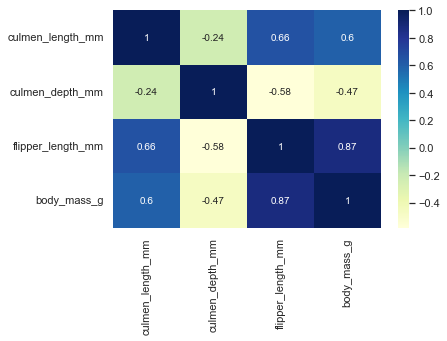

In [9]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

***Task 5:*** Produce a scatter plot that shows the relationship between body mass and flipper length as illustrated below. [0.5 mark]

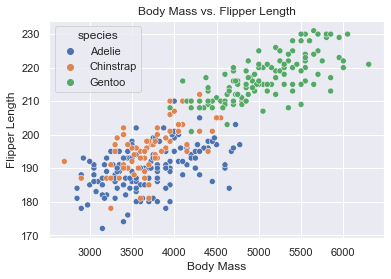

<Figure size 1152x720 with 0 Axes>

In [10]:
plot = sns.scatterplot(
    data = df,
    x = 'body_mass_g',
    y = 'flipper_length_mm',
    hue = 'species',
    hue_order = ['Adelie','Chinstrap', 'Gentoo']
)
plot.set(title='Body Mass vs. Flipper Length')
plot.set(xlabel='Body Mass', ylabel='Flipper Length')
plt.figure(figsize=(16,10))
plt.show()


***Task 6:*** Display value counts for the species, island and sex. [0.75 mark]

In [11]:
## Display value counts for the species, island and sex
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [12]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [13]:
df['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

***Task 7:*** Explore where the full stop comes from, display the corresponding row, replace the full stop by 'FEMALE', and then display the modified row again. [0.25 mark]

In [14]:
df.loc[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [15]:
df['sex'] = df['sex'].replace(['.'],'FEMALE')

In [16]:
df.iloc[[336]]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,FEMALE


***Task 8:*** Apply one hot encoding to the categorical features 'sex' and 'island' and display the head of the resulting dataframe as illustrated below. [0.5 mark] 

In [17]:
y = pd.get_dummies(df.sex, prefix='sex')
i = pd.get_dummies(df.island, prefix='island')
final_df = df.join(y)
final_df = final_df.join(i)
final_df.drop('sex', axis=1, inplace=True)
final_df.drop('island', axis=1, inplace=True)
final_df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.10000,18.70000,181.000000,3750.000000,0,1,0,0,1
1,Adelie,39.50000,17.40000,186.000000,3800.000000,1,0,0,0,1
2,Adelie,40.30000,18.00000,195.000000,3250.000000,1,0,0,0,1
3,Adelie,43.92193,17.15117,200.915205,4201.754386,0,1,0,0,1
4,Adelie,36.70000,19.30000,193.000000,3450.000000,1,0,0,0,1


***Task 9:*** Use value encoding ({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}) for the target variable ('species') and display the resulting dataframe as displayed below. [0.5 mark]

In [18]:
final_df.species.replace(('Adelie','Chinstrap','Gentoo'),(0,1,2), inplace=True)
final_df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,0,39.10000,18.70000,181.000000,3750.000000,0,1,0,0,1
1,0,39.50000,17.40000,186.000000,3800.000000,1,0,0,0,1
2,0,40.30000,18.00000,195.000000,3250.000000,1,0,0,0,1
3,0,43.92193,17.15117,200.915205,4201.754386,0,1,0,0,1
4,0,36.70000,19.30000,193.000000,3450.000000,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
339,2,43.92193,17.15117,200.915205,4201.754386,0,1,1,0,0
340,2,46.80000,14.30000,215.000000,4850.000000,1,0,1,0,0
341,2,50.40000,15.70000,222.000000,5750.000000,0,1,1,0,0
342,2,45.20000,14.80000,212.000000,5200.000000,1,0,1,0,0


## Machine Learning Algorithms

***Task 10:*** Use the train_test_split function of the sklearn library and split the independent variables and the target variable ('species') into a training set (80%) and into a test set (20%) and use random_state = 0 to make the solution reproducible. [0.5 mark]

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(final_df, test_size=0.2, random_state=0)
print(train.shape)
print(test.shape)

(275, 10)
(69, 10)


In [ ]:
# the independent variables
feature_cols = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex_FEMALE',
 'sex_MALE','island_Biscoe','island_Dream','island_Torgersen']
#for training
X_train = train[feature_cols]
y_train = train['species']
# for testing
X_test = test[feature_cols]
y_test = test['species']

***Task 11:*** Use the KNeighborsClassifier (n_neighbors = 6) of the sklearn library, fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Creating and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 6) 
clf.fit(X_train, y_train)

# Using the model to predict testing data
KNC_pred = clf.predict(X_test)
print('Testing accuracy is: ', accuracy_score(KNC_pred, y_test)*100)

Testing accuracy is:  76.81159420289855


***Task 12:*** Use GridSearchCV function (with cv = 5) of the sklearn library and find the best value for the neighbors in the range from 1 to 20 for the KNeighborsClassifier and display the best value. [0.5 mark]

In [22]:
from sklearn.model_selection import GridSearchCV
# Defining search space for parameters
parameter_grid = {'n_neighbors': range(1, 20)}

# Creating the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=5)
clf.fit(X_train,y_train)

# Identifing the best parameter(s)
print('The best value for the neighbors: ', clf.best_params_['n_neighbors'])

The best value for the neighbors:  1


***Task 13:*** Use the SVC() classifier (with the parameters: kernel='poly', random_state=0), fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [23]:
from sklearn.svm import SVC # "Support vector classifier"
svc = SVC(kernel='poly', random_state=0)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
# Evaluating the accuracy of the trained model accuracy_score
print('Model accuracy for SVC:', accuracy_score(y_test, svc_pred)*100)


Model accuracy for SVC: 76.81159420289855


***Task 14:*** Use the DecisionTreeClassifier (with the parameter: random_state=0) of the sklearn library, fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [24]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
DTC = DecisionTreeClassifier(random_state=0)
# Train Decision Tree Classifer
DTC.fit(X_train,y_train)

#Predict the response for test dataset
DTC_pred = DTC.predict(X_test)
print('Accuracy for DecisionTreeClassifier:', accuracy_score(y_test, DTC_pred)*100)

Accuracy for DecisionTreeClassifier: 98.55072463768117


***Task 15:*** Use the RadomForestClassifier (with the parameter: random_state=0) of the sklearn library, fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [25]:
from sklearn.ensemble import RandomForestClassifier
# # Random Forest Classifier
RFC = RandomForestClassifier(random_state=0)
# Train Decision Tree Classifer
RFC.fit(X_train,y_train)

#Predict the response for test dataset
RFC_pred = RFC.predict(X_test)
print('Accuracy for RandomForestClassifier:', accuracy_score(y_test, RFC_pred)*100)

Accuracy for RandomForestClassifier: 100.0


***Task 16***: Now use the StandardScaler of the sklearn library and scale the independent variables and run the tasks 10-15 again. Describe in a "markdown" cell in no more than 150 words what different results you observe. [2.5 marks]

In [26]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
# standardization 
scale = object.fit_transform(final_df[feature_cols]) 
print(scale)

[[-0.88708123  0.78774251 -1.42248782 ... -0.97700842 -0.75075719
   2.36968028]
 [-0.81349399  0.12655633 -1.06535169 ... -0.97700842 -0.75075719
   2.36968028]
 [-0.66631952  0.43171918 -0.42250666 ... -0.97700842 -0.75075719
   2.36968028]
 ...
 [ 1.1917582  -0.73807176  1.50602843 ...  1.02353263 -0.75075719
  -0.42199786]
 [ 0.23512413 -1.19581604  0.79175618 ...  1.02353263 -0.75075719
  -0.42199786]
 [ 1.09977416 -0.53462985  0.8631834  ...  1.02353263 -0.75075719
  -0.42199786]]


In [27]:
scaled_df = pd.DataFrame(scale)
scaled_df['species'] = final_df['species']
from sklearn.model_selection import train_test_split
train2, test2 = train_test_split(scaled_df, test_size=0.2, random_state=0)
feature_cols = [0,	1,	2,	3,	4,	5,	6,	7,	8]
X_train2 = train2[feature_cols]
y_train2 = train2['species']
# for testing
X_test2 = test2[feature_cols]
y_test2 = test2['species']

In [28]:
# Creating and training a KNN classifier model
clf2 = KNeighborsClassifier(n_neighbors = 6) 
clf2.fit(X_train2, y_train2)
KNC_pred2 = clf2.predict(X_test2)
print('Testing accuracy is: ', accuracy_score(y_test2,KNC_pred2))

Testing accuracy is:  0.9855072463768116


In [29]:
# GridSearchCV
parameter_grid2 = {'n_neighbors': range(1, 20)}

# Creating the machine learning model
knn_clf2 = KNeighborsClassifier()
clf2 = GridSearchCV(knn_clf2, parameter_grid2, scoring='accuracy', cv=5)
clf2.fit(X_train2,y_train2)

# Identifing the best parameter(s)
print('The best value for the neighbors: ', clf2.best_params_['n_neighbors'])

The best value for the neighbors:  2


In [30]:
# "Support vector classifier"
svc2 = SVC(kernel='poly', random_state=0)
svc2.fit(X_train2,y_train2)
svc_pred2 = svc2.predict(X_test2)
# Evaluating the accuracy of the trained model accuracy_score
print('Model accuracy for SVC:', accuracy_score(y_test2, svc_pred2)*100)

Model accuracy for SVC: 98.55072463768117


In [31]:
#  Decision Tree classifer
DTC2 = DecisionTreeClassifier(random_state=0)
# Train Decision Tree Classifer
DTC2.fit(X_train2,y_train2)

#Predict the response for test dataset
DTC_pred2 = DTC2.predict(X_test2)
print('Accuracy for DecisionTreeClassifier:', accuracy_score(y_test2, DTC_pred2)*100)

Accuracy for DecisionTreeClassifier: 98.55072463768117


In [32]:
# Random Forest Classifier
RFC2 = RandomForestClassifier(random_state=0)
# Train Decision Tree Classifer
RFC2.fit(X_train2,y_train2)

#Predict the response for test dataset
RFC_pred2 = RFC2.predict(X_test2)
print('Accuracy for RandomForestClassifier:', accuracy_score(y_test2, RFC_pred2)*100)

Accuracy for RandomForestClassifier: 100.0


In [33]:
# Comparison table 
comp_tab = {'Result without scaling': [accuracy_score(KNC_pred, y_test)*100, clf.best_params_['n_neighbors'],
                 accuracy_score(y_test, svc_pred)*100, accuracy_score(y_test, DTC_pred)*100,
                 accuracy_score(y_test, RFC_pred)*100],
        'Result with scaling': [accuracy_score(KNC_pred2, y_test2)*100,clf2.best_params_['n_neighbors'],
                                accuracy_score(y_test2,svc_pred2)*100,
                accuracy_score(y_test2, DTC_pred2)*100,accuracy_score(y_test2, RFC_pred2)*100] 
           }  
      
# Create DataFrame  
comp_tab = pd.DataFrame(comp_tab,index =['KNN classifier', 'GridSearchCV', 'Support vector classifier', 
                                        'Decision Tree classifer','Random Forest Classifier'] )  
  
# Print the output.  
print(comp_tab)  

                           Result without scaling  Result with scaling
KNN classifier                          76.811594            98.550725
GridSearchCV                             1.000000             2.000000
Support vector classifier               76.811594            98.550725
Decision Tree classifer                 98.550725            98.550725
Random Forest Classifier               100.000000           100.000000


##### Conclusion
As it can be clearly seen above, the KNN classifier and the Support vector classifier provided better solutions after scaling the independent variables as it was expected. GridSearchCV changed the best number of neighbours to 2 as scaling strongly affects KNN.By scaling the independent variables, we reduce the effect of outliers; therefore, we usually get better results when we scale them. Since they are not sensitive to the variance in the data, the accuracies of Decision Tree and Random Forest classifiers did not change.

After scaling the independent variables, 3 models(KNN classifier,Support vector classifier and Decision Tree classifer) gave the same accuracy score as %98.550725. It could be due to the fact that this is the best accuracy rate you can get with these independent variables. On the other hand, Accuracy of Random Forest Classifier is 100%, indication that the model probably overfitted the data.
